<font size="7"><center>CNN Image Classifier for Sport Trading Cards </center></font>


<div class="alert alert-warning">
    
<font size="2">__Author__: -  Kasun Malwenna</font>

<font size="2">__Contact__: - kasunmalwenna@gmail.com</font>
    
---
    
This notebook outlines the construction of a Deep Convolutional Neural Network (CNN) for classifying Sports Trading Cards into their respective sports via computer vision.
    
---  
</div>


># 1. Introduction

This project is part of a collabarative tech sprint among Data science, UX design and Web Development students challenging to create digital solutions for one of BrainStation's industry partners - ALT(a leading sports trading card marketplace)

*Problem space: How can we help ALT’s users navigate the world of trading goods and make more informed trading and investment decisions?*

*Proposed Solustion - Incorporate chatrooms into its existing webplatform in order to enable user interactions between like-minded collectors. This will serve as a social platform where collectors can network, exhibit their collections, and learn more about trading cards, all while increasing the engagement with ALT.*



__How does Data Science/ AI fit in?__

Implement a deep learning-based image classifier to accurately identify the sport depicted on sport trading cards and facilitate assigning users to appropriate chatrooms based on the cards in the user's vault.


### About ALT

ALT is a dedicated sports trading card marketplace, offering users a comprehensive selection of cards from a wide range of sports, including football, basketball, baseball, hockey and more. Not only does the platform enable users to buy, sell, and trade different types of sports trading cards, it also provides a community for enthusiasts to come together and easily connect with one another, as well as access historical card pricing and trends. In this way, ALT strives to create a safe, secure, and transparent environment for sports trading card collectors from around the world to buy, sell, and trade with ease.

---
># 2. Data

### 2.1 Data Collection

For this project, Sports card images were obtained via [ALT](https://www.alt.xyz/), using the [Download All Images chrome extension](https://chrome.google.com/webstore/detail/download-all-images/ifipmflagepipjokmbdecpmjbibjnakm), a bulk image downloader that enables downloading the images from a web page and saving them as a .zip file. The images were collected from four major sporting categories: Baseball, Basketball, Football, and Pokemon.

### 2.2 Importing Libraries and Setting Up Dependencies

In [2]:
# Importing standard data science libraries 
import numpy as np

# Importing visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Importing required library to navigate through directories
import os

# Importing required library to read images
import cv2

# Importing required library to read image type
import imghdr

# Importing required deep learning library
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Importing required library for model evaluation
from sklearn.metrics import confusion_matrix

# Importing required metrics for model evaluation
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

By default tensorflow will use all the VRAM available in the system that can cause Out of Memory Error (OOM). To avoid this we can set the VRAM usage limit by using the following code.

In [2]:

# Avoid OOM errors by setting GPU Memory Consumption Growth

# Grab a list of all available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
# For each GPU, restrict TensorFlow to not allocate all memory on the device.
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [3]:
# Check if GPU is available on our machine
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

We have one GPU available on our machine.

### 2.3 Importing Images

Let's create a variable to store the path to the dataset folder and a list of image extensions that are used in this project.

In [5]:
# Defining the path to the data directory
data_dir = 'data' 

#
image_exts = ['jpeg','jpg', 'bmp', 'png']



In [6]:
# Check folders inside data folder
os.listdir(data_dir)

['Baseball', 'Basketball', 'Football', 'Pokemon']

In [7]:
# Check every file inside Baseball sub folder
os.listdir(os.path.join(data_dir, 'Baseball'))

['00bd2b8d-adbc-4321-9664-8fdacf3c3de7_front2.png',
 '010086e2-1e07-48e1-bc18-104a1ba27068_1670526907490_front2.png',
 '0147c157-8b46-486e-9bee-6d1db343cd67_front2.png',
 '01745e84-bcfe-42fd-9f6a-cd7ff9924746_front2.png',
 '01e7e32d-5cc7-4d74-9745-4988e2cdb28a_front2.png',
 '032a13b0-87af-4117-ac63-1ded7bf54478_1667411724777_front2.png',
 '045b49e1-02ca-4279-a794-a49db0f59758_front2.png',
 '0659e7d4-c0f3-43ff-beec-34665b86e60a_front2.png',
 '080fb7ea-ff48-48be-bc78-167d41ad04e2_front2.png',
 '08335d0b-d376-4f64-b464-207062a84dff_front2.png',
 '08b7b1f6-a06a-4953-9963-c4eaebfd957a_1666721970542_front2.png',
 '0a0c7552-d494-4ced-9d1e-deb00429a65c_1668094278897_front2.png',
 '0a7a4fbd-13a9-4795-b8f6-dee65817461b_1670523487629_front2.png',
 '0a84dc3d-c50d-449e-9392-bcd7e587e1f3_1668026256187_front2.png',
 '0c2c377b-c0a2-4797-ab08-c59d1fc44604_front2.jpg',
 '0ca0bb69-1caf-4700-916f-4bc7956e333e_front2.png',
 '0d13c735-9834-48a3-a2de-fee22032dc6f_1670511717403_front2.png',
 '0dbb8718-b797-4b

In [8]:
# Check every class inside data folder
for image_class in os.listdir(data_dir):
    print(image_class)

Baseball
Basketball
Football
Pokemon


The folders inside the data folder are also the classes of images we want to classify. The images inside each folder are the training and testing data for that class. 

Let's read in an image as a numpy array and check its shape.

In [9]:
# Read image
img = cv2.imread(os.path.join(data_dir,'Baseball','1ef764c0-77d6-422d-87c2-b2f3befaa9d0_front2.png'))
img

array([[[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       ...,

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]]

In [10]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(8192, 4893, 3)


Our image is a 3D array of 3 channels (RGB) and 8192x4893 pixels. Let's visualize it.


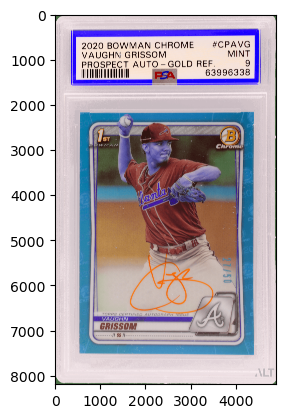

In [11]:
# Plot image
plt.imshow(img)

The reason for mixed-up color channels is that OpenCV reads images in BGR format. So we need to convert it to RGB format to display using matplotlib. We can do that by passing through a color conversion flag to `cv2.cvtColor()` function, which will reorder the color channels.

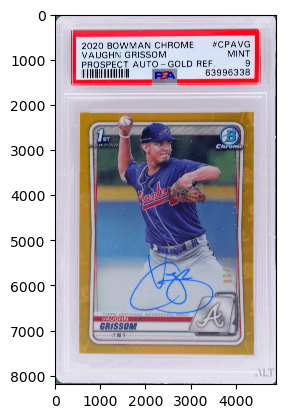

In [12]:
# Convert image to RGB
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

### 2.4 Remove corrupted images

When we use an online image downloader to download images, there can be some images that are not in the correct format or not even readable by the library. We can remove such images by using the following code:

In [ ]:
%%time
# Nested for loop to read all images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        # check if the image is readable and in an allowed format
        try:
            # Check if the image can be readable
            img = cv2.imread(image_path) 
            # Check if the extension of the image is allowed
            tip = imghdr.what(image_path) 
            if tip not in image_exts: 
                print('Image not in allowed extensions list {}'.format(image_path))
                # remove images from folder
                os.remove(image_path) 
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # remove images from folder
             os.remove(image_path) 

We do not have any undesired images in our dataset.

### 2.5 Building a Data Pipeline

Tensorflow has an API `tf.data.Dataset` that can be used to build a data pipeline rather than loading all the data into memory at once. This is useful when you have a large dataset that cannot fit into memory. Instead of accessing the API directly, we can use
Keras utility function `tf.keras.utils.image_dataset_from_directory` that builds an image data set from a directory by applying a number of preprocessing steps such as rescaling images to 256x256, generating labels, changing color to RGB, dividing to batch sizes of 32, shuffle and more.


In [8]:
# documentation for tf.keras.preprocessing.image_dataset_from_directory
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [13]:
# Build the dataset
data = tf.keras.utils.image_dataset_from_directory('data')


Found 845 files belonging to 4 classes.


We have 4 classes in our dataset with 845 images in total. However this is not a dataset that is loaded to our memory. Instead, we have a dataset object that is a generator. This means that we can iterate over it and get batches of images. 

In [14]:
# Convert data into a numpy iterator
data_iterator = data.as_numpy_iterator()

In [15]:
data_iterator

We now have an iterator that allows us to access the pipeline. We can use the `next()` function to access the next batch of data or the first batch in this instance.

In [16]:
# Get the first batch
batch = data_iterator.next()

In [17]:
# show the first batch
batch

(array([[[[182.      , 177.      , 191.      ],
          [182.      , 177.      , 191.      ],
          [182.      , 177.      , 191.      ],
          ...,
          [189.5     , 185.      , 198.5     ],
          [182.      , 177.      , 191.      ],
          [182.      , 177.      , 191.      ]],
 
         [[182.      , 177.      , 191.      ],
          [182.      , 177.      , 191.      ],
          [182.      , 177.      , 191.      ],
          ...,
          [212.      , 210.5     , 230.      ],
          [209.      , 207.      , 226.      ],
          [200.      , 197.      , 213.74805 ]],
 
         [[182.      , 177.      , 191.      ],
          [198.53516 , 195.5586  , 209.58203 ],
          [230.      , 230.      , 248.      ],
          ...,
          [202.      , 207.      , 228.      ],
          [198.      , 197.      , 219.      ],
          [208.      , 206.      , 224.      ]],
 
         ...,
 
         [[182.      , 177.      , 191.      ],
          [182.   

In [18]:
# check the length of the batch
len(batch)

2

The length is 2 as expected as we have 2 elements in the batch. First element is the image and second element is the label.

In [19]:
# Look at the first element of the first batch
batch[0]

array([[[[182.      , 177.      , 191.      ],
         [182.      , 177.      , 191.      ],
         [182.      , 177.      , 191.      ],
         ...,
         [189.5     , 185.      , 198.5     ],
         [182.      , 177.      , 191.      ],
         [182.      , 177.      , 191.      ]],

        [[182.      , 177.      , 191.      ],
         [182.      , 177.      , 191.      ],
         [182.      , 177.      , 191.      ],
         ...,
         [212.      , 210.5     , 230.      ],
         [209.      , 207.      , 226.      ],
         [200.      , 197.      , 213.74805 ]],

        [[182.      , 177.      , 191.      ],
         [198.53516 , 195.5586  , 209.58203 ],
         [230.      , 230.      , 248.      ],
         ...,
         [202.      , 207.      , 228.      ],
         [198.      , 197.      , 219.      ],
         [208.      , 206.      , 224.      ]],

        ...,

        [[182.      , 177.      , 191.      ],
         [182.      , 177.      , 191.      ]

In [20]:
# check the shape of the first element
batch[0].shape

(32, 256, 256, 3)

This confirms that the Keras utility function has rescaled the colored images to 256x256 pixels and batched them into 32 images per batch.

In [21]:
# Look at the lebel for each image in the first batch
batch[1]

array([2, 3, 3, 2, 3, 0, 0, 2, 1, 1, 0, 1, 0, 2, 3, 1, 2, 0, 0, 1, 1, 1,
       1, 3, 3, 1, 1, 3, 0, 1, 0, 2])

At this stage, we are unaware of which label corresponds to which class. We can find out by plotting the images with their labels.

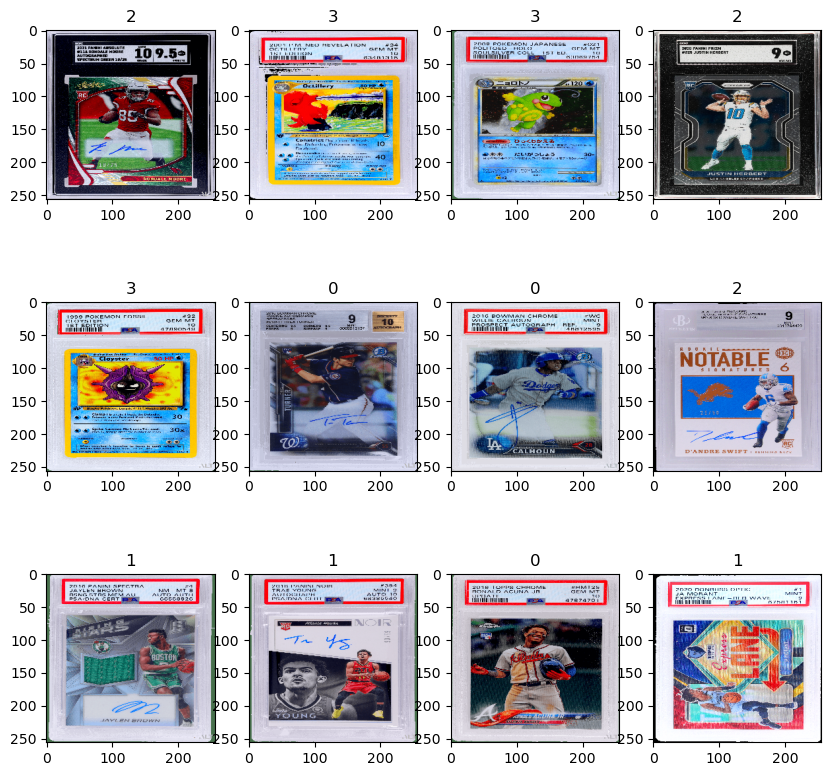

In [22]:
# Plot the first 12 images in the first batch
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
ax = ax.flatten()
for idx, img in enumerate(batch[0][:12]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


By observing the above plot, we can sate that

- Class 0 is Baseball
- Class 1 is Basketball
- Class 2 is Football
- Class 3 is Pokemon

---
># 3. Preprocessing Data


### 3.1 Scale data

The numeric representation of an image from our pipeline is between 0 and 255. For a deep learning model to optimize faster, we need to normalize the data to between 0 and 1. We can do this by dividing the data by 255.

In [23]:
# Check the min and max values of an image
print(batch[0].min())
print(batch[0].max())

0.0
255.0


The most efficient way to normalize the data is to use the `map` function as we load the data using the data pipeline. This function allows us to apply a transformation to each element in a dataset. In this case, we will use the map function to divide the first element, which is the images in the dataset, by 255.

In [24]:
# Normalize the data as we load it
data = data.map(lambda x,y: (x/255, y))

In [25]:
# Grab another batch
scaled_iterator = data.as_numpy_iterator().next()


In [26]:
# Check the min and max values of an image again
print(scaled_iterator[0].min())
print(scaled_iterator[0].max())

0.0
1.0


We have normalized the images. Let's plot the first 12 images in the new batch.

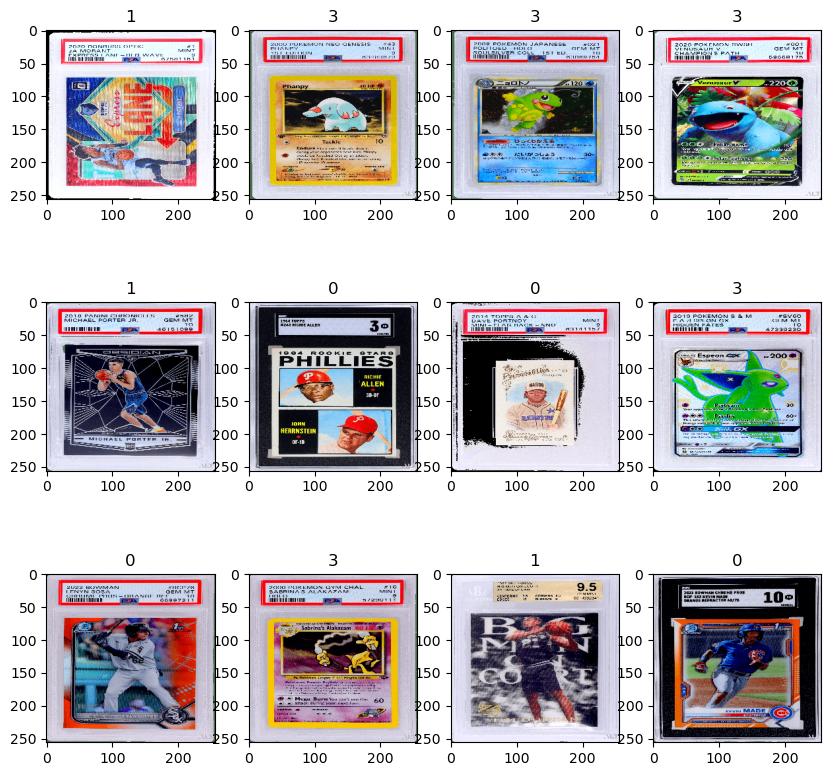

In [27]:
# Plot the first 12 images in the new batch
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
ax = ax.flatten()
for idx, img in enumerate(scaled_iterator[0][:12]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_iterator[1][idx])


### 3.2 Split data

Inorder to prevent data leakage to the model, we must split the data into training, validation and test sets and only train the model using the training set. We will use the validation set to tune the model and the test set to evaluate the model.
Let's first check how many batches we have in the dataset to determine the split ratio.

In [28]:
# check the number of batches
len(data)

27

We have 27 batches with 32 images in each batch.

Let's assign 70% of the data to the training set, 20% to the validation set and the rest to the test set. However, we need the batch sizes to be integers and converting to int type will round down the number; we will add 1 batch to the validation and test set to compensate for that and split all 27 batches.

In [29]:
# Define size of each batch
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [30]:
print(f'Train batches {train_size}')
print(f'Validation batches {val_size}')
print(f'Test batches {test_size}')

Train batches 18
Validation batches 6
Test batches 3


We have established how many batches each set should have. Now in order to allocate data according to this, we can use `.take` and `.skip` methods available in our pipeline. It is best practice to shuffle data before this to include all classes in each partition, but we have already shuffled data when we created the data pipeline.

In [31]:
# Assing train data
train = data.take(train_size)
# Skip already assinged train data and assign validation data
val = data.skip(train_size).take(val_size)
# Skip already assinged train and validation data and assign test data
test = data.skip(train_size+val_size).take(test_size)

Now that we have allocated our data to each set let’s check the number of batches in each set.

In [32]:
len(train)

18

In [33]:
len(val)

6

In [34]:
len(test)

3

---
># 4. Model Development


### 4.1 Model creation

Let's build a  __convolutional neural network (CNN__) model to classify the images, using __sequential__ API. The Sequential API in Keras is a simple way to create a linear stack of layers in a neural network model. It allows us to easily create models by adding one layer at a time, without having to explicitly create the input and output layers. This makes it a convenient way to build simple, feedforward neural network models, as we can simply add layers to the model in the order that they should be connected. 

We will also use Conv2D and MaxPooling2D layers which  are commonly used in CNNs. These layers work together to extract features from the input image for image classification.

-__Conv2D__  - Applies a convolution operation to the input data, where a set of learnable filters are used to extract features from the input. The filters slide over the input, performing dot products with the input at each position, and the resulting activations are then passed through an activation function. Conv2D layer can be used to detect specific patterns in the input data and reduce the dimensionality of the data.

-__MaxPooling2D__ - Applies a max pooling operation which is a form of down-sampling, where the maximum value of a set of input values is taken as the output. Max pooling is applied to the input data, reducing its spatial size and helping to reduce overfitting and computational cost.

We will use the __Relu__ activation function as it is the most commonly used activation. For the output, we can use __softmax__ as we have a multi-class classification problem.


In [44]:
# Create a new sequential model
model = Sequential()

# Add an input convolutional layer with 16 filters, a 3x3 kernel, a stride of 1, and a relu activation function
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# Add a max pooling layer
model.add(MaxPooling2D())

# Add additional convolutional layers and max pooling layers
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

# Declare the output layer
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

Now we can complie the model and fit it to the data.

#### Which optimizer to use?

Optimizers are algorithms used to update the parameters of a deep neural network during the training process. The goal of the optimizer is to find the set of weights and biases that minimize the loss function, which measures the difference between the predicted output and the true output.There are several different types of optimizers commonly used in deep neural networks, each with their own strengths and weaknesses.
Choosing the right optimizer depends on the specific problem and dataset. 

We will use __Adam__ as it is a widely used optimization algorithm because it is computationally efficient and often provides good solutions in a short amount of time.
Adam is a combination of both Momentum (algorithm that updates the parameters based on a moving average of the past gradients) and RMSpropc (algorithm that updates the parameters based on the gradient of the loss function with respect to the parameters and the previous updates, and adapts the learning rate for each parameter individually) optimization algorithms with the advantage of bias correction.

We will also use ___sparse_categorical_crossentropy__ as our loss function and __accuracy__ as the metric we are tracking as this is a multiclass classification. 

In [45]:
# Compile the model with adam optimizer, sparse categorical crossentropy loss, and accuracy metrics
model.compile('adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [46]:
# Looking at the architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

We have approximately 3.7 million parameters to train in the model which is a large number. Therefore, utilizing a GPU was a good choice.

### 4.2 Training

We will create logs directory inside the local directry to store the training logs.

In [47]:
# Create a logs directory
logdir='logs'


There are objects in Keras called __Callbacks__ that will perform various acts during the training stage. Let’s employ them to efficiently train our model.

`EarlyStopping`

NN training is a demanding time-consuming process as the number of epochs increases. Early stopping will monitor the desired metric ('val_loss' for our model) and terminate training when there is no significant improvement.

Importance parameters of EarlyStopping;

- monitor - Metric to be monitored
- mode - Tells if the metric monitored should decrease or increase to terminate training. 'min' for val_loss, 'max' for accuracy
- patience - Number of epochs with no improvement after which training will be stopped.

`ModelChekpoint`

Save the model weights at an interval such that the model and weights can be loaded later to continue training.

Importance parameters of ModelChekpoint;

- monitor - Metric to be monitored
- mode - Tells if the metric monitored should decrease or increase to be considered as the best model. 'min' for val_loss, 'max' for accuracy
- save_best_only -Boolean value. If True, only saves the model when it is considered best.

`TensorBoard`

TensorBoard provides the visualization and tooling needed for machine learning experimentation.

In [54]:
# Define the callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

Now we can fit and train the model.

In [55]:
%%time
# Fit the model
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback, early_stop, model_checkpoint])

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 1.3245 - accuracy: 0.3785
Epoch 1: val_loss improved from inf to 1.12820, saving model to best_model.h5
18/18 [==============================] - 65s 3s/step - loss: 1.3245 - accuracy: 0.3785 - val_loss: 1.1282 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 0.9286 - accuracy: 0.5990
Epoch 2: val_loss improved from 1.12820 to 0.76466, saving model to best_model.h5
18/18 [==============================] - 67s 3s/step - loss: 0.9286 - accuracy: 0.5990 - val_loss: 0.7647 - val_accuracy: 0.6875
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 0.6664 - accuracy: 0.7326
Epoch 3: val_loss improved from 0.76466 to 0.75333, saving model to best_model.h5
18/18 [==============================] - 71s 3s/step - loss: 0.6664 - accuracy: 0.7326 - val_loss: 0.7533 - val_accuracy: 0.6771
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 0.5163 - accuracy: 0.

With the use of GPU, it took 29min 35s to train the model. 

In [56]:
# Look at the history of the model
hist.history

{'loss': [1.3245031833648682,
  0.9285700917243958,
  0.6664322018623352,
  0.5162802934646606,
  0.36663925647735596,
  0.263049453496933,
  0.18200142681598663,
  0.09524255990982056,
  0.10926822572946548,
  0.07269493490457535,
  0.04303862899541855,
  0.02558666281402111,
  0.012716771103441715,
  0.009815149940550327,
  0.015619761310517788,
  0.034157056361436844,
  0.019847534596920013,
  0.015707215294241905,
  0.021146439015865326,
  0.010394555516541004,
  0.00877024233341217,
  0.06503695994615555,
  0.10880407691001892,
  0.09740592539310455,
  0.03274063766002655],
 'accuracy': [0.3784722089767456,
  0.5989583134651184,
  0.7326388955116272,
  0.8003472089767456,
  0.8680555820465088,
  0.9131944179534912,
  0.9409722089767456,
  0.9739583134651184,
  0.9774305820465088,
  0.984375,
  0.9982638955116272,
  0.9982638955116272,
  0.9982638955116272,
  1.0,
  0.9947916865348816,
  0.9930555820465088,
  0.9930555820465088,
  0.9930555820465088,
  0.9982638955116272,
  1.0,
  

### 4.3 Plotting proformance

Inorder to visualize the proformance of the model we will use the history object returned by the fit method and plot the loss and accuracy for both the training and validation sets.

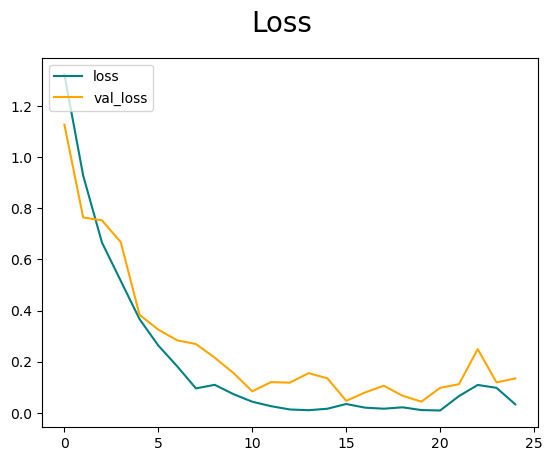

In [57]:
# Plot the training loss and validation loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

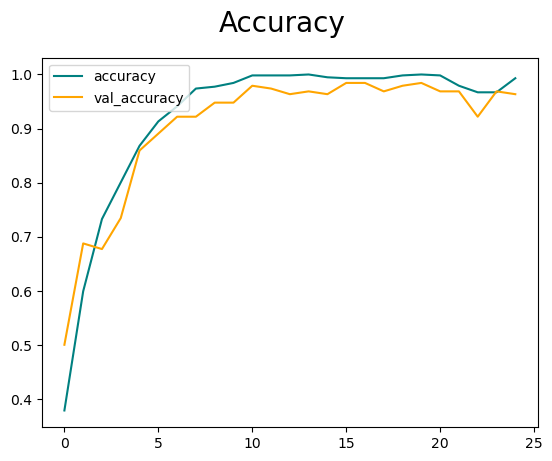

In [58]:
# Plot the training accuracy and validation accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

__Training Observations__ 

- no indication of overfitting as both training and validation loss and accuracy are improving with each epoch and are close to each other.
- Accuracy was improved, and loss was signally dropped, indicating the good performance of the model. 
- Due to the diminished performance of the model on validation data, training was terminated at the 25th epoch.


---
># 4. Evaluate model


### 4.1 Using the Test Set to Evaluate the Model

We can use the unseen test set to evaluate the model, However, accuracy alone is not always a good metric to base our evaluation on. We can employ the confusion matrix for better evaluation and interpretation of the model. We can also look at Precision and Recall as additional metrics.

- Precision - The number of true positives divided by the number of true positives plus the number of false positives. Precision is a measure of a classifier’s exactness.
- Recall - The number of true positives divided by the number of true positives plus the number of false negatives. The recall is a measure of a classifier’s completeness.

Let's instantiate these metrics first.


In [36]:
# Instantiate the metrics
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

We saved the best model in the best_model.h5 file.

In [37]:
# Load the best model
best_model = load_model('best_model.h5')

In [38]:
# Loop through the test data and update the metrics
for batch in test.as_numpy_iterator(): 
    X_test, y_test = batch
    # Predict the probabilities
    predict_probas = best_model.predict(X_test)
    # Get the predicted class
    y_pred = np.argmax(predict_probas, axis=1)
    # Update the metrics
    pre.update_state(y_test, y_pred)
    re.update_state(y_test, y_pred)
    


1/1 [==============================] - 0s 268ms/step


In [64]:
print(f'Test precision: {pre.result().numpy()} \nTest recall : {re.result().numpy()}')

Test precision: 0.9642857313156128 
Test recall : 1.0


In [65]:
# Evaluate the model's performance on the test data
score = best_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 231ms/step - loss: 0.0137 - accuracy: 1.0000
Test loss: 0.013689359650015831
Test accuracy: 1.0


Our model is performing exceptionally well with perfect accuracy and recall as well as high precision. These metrics can differ once we increase the test data size.

In [80]:
X_test.shape

(13, 256, 256, 3)

Let's use a confusion matrix to interpret the results of our model on test data.

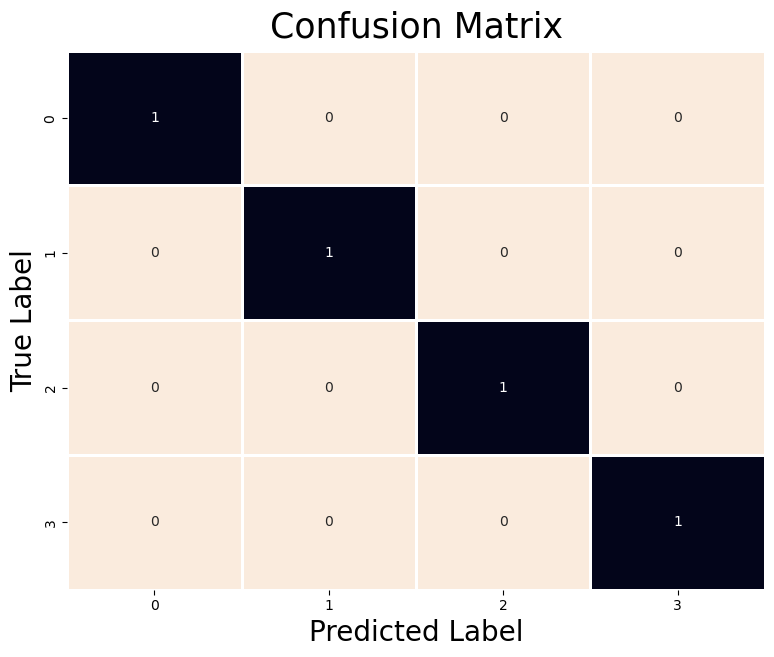

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix using sklearn 
conf_mat = confusion_matrix(y_test, y_pred)

# Since we have many images, it is helpful to show our 
# results as fractions of the total number of images 
# for each class.
normalized_conf_mat = conf_mat / conf_mat.sum(axis=1)

plt.figure(figsize = (9,7))
sns.heatmap(normalized_conf_mat,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

We have a perfect confusion matrix. No confusion between the classes. We managed to classify all the images correctly. Lets's visualize the predictions alongside the actual labels.

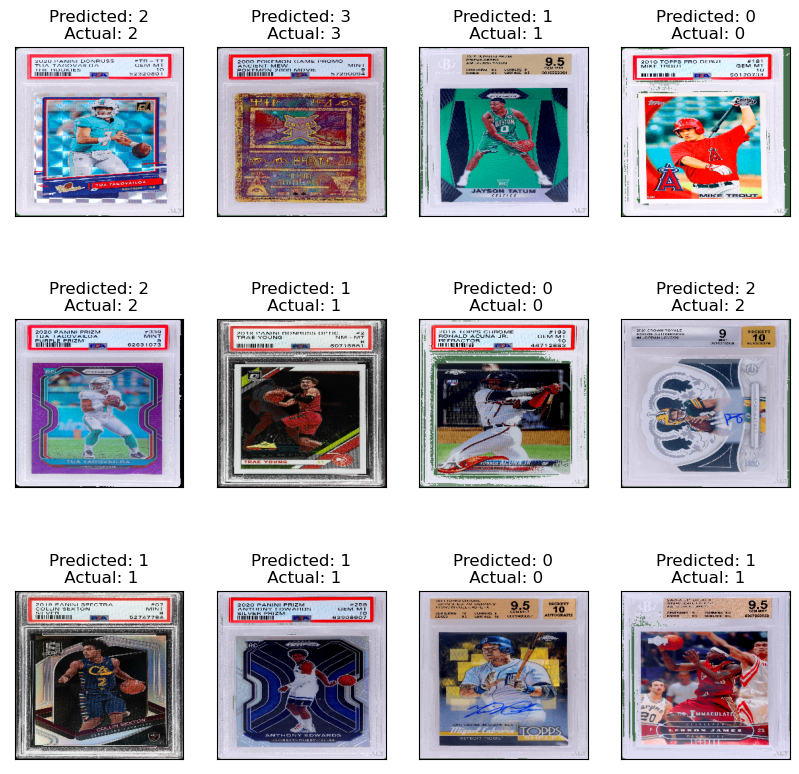

In [71]:
# Get the indices of the images that were correctly classified which is all
correct_photos = y_test == y_pred

# Define the number of images to display and layout
num_images = 12
columns = 4
rows = 3

# Create a figure with subplots
fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))

ax = ax.flatten()

# Loop through the images and display them
for i, image in enumerate(X_test[correct_photos][:num_images]):
    ax[i].imshow(image)
 
    # Get predicted label
    prediction = y_pred[correct_photos][i]
    
    # Get actual label
    actual = y_test[correct_photos][i]
    
    # Set the title of the subplot
    ax[i].set_title(f"Predicted: {prediction}\n Actual: {actual}")
    
    # Hide the x and y ticks to make 
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])

plt.show()
fig.tight_layout()

### 4.2 Using a new image to Evaluate the Model 

To further evaluate the model, let's see if our model can correctly classify a newly downloaded trading card image.

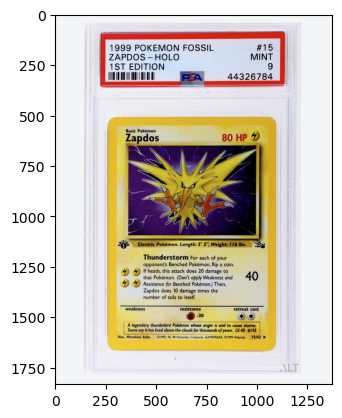

In [72]:
# Load the new image
img1 = cv2.imread('pokemon_test.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()


We must preprocess the image before we can use it to make predictions.

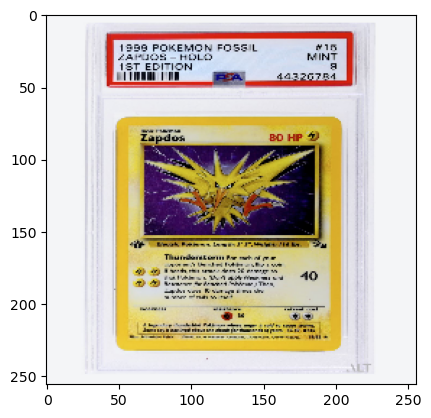

In [73]:
# resize the image
resize1 = tf.image.resize(img1, (256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

We must extra dimension and scale image to make predictions as model is expecting images as batches.

In [74]:
# Original shape
# resize1.shape

TensorShape([256, 256, 3])

In [75]:
# Add extra dimension
# np.expand_dims(resize1, 0).shape

(1, 256, 256, 3)

In [76]:
# Scale and add extra dim in one line and get the probabilities
img1_pred = best_model.predict(np.expand_dims(resize1/255, 0))

1/1 [==============================] - 0s 218ms/step


In [77]:
# Look at the probabilities for each class
img1_pred

array([[1.1828514e-03, 1.5234142e-03, 7.4719086e-05, 9.9721897e-01]],
      dtype=float32)

The maximum value corresponds to the class with the highest probability. In this case, the model labels the card as class 3.

In [78]:
# Get the predicted label
pred_label = np.argmax(img1_pred, axis=1)
pred_label

array([3], dtype=int64)

In [79]:
# Conditional block to print the predicted class name
if pred_label == 0: 
    print(f'Predicted class is Baseball')
elif pred_label == 1:
    print(f'Predicted class is Basketball')
elif pred_label == 2:
    print(f'Predicted class is Football')
else:
    print(f'Predicted class is Pokemon')

Predicted class is Pokemon


Our model correctly classified the image as a Pokemon trading card.

#### Save the model

Let's save the model for future use.

In [271]:
# Save the model
model.save(os.path.join('models','ALT_Card_classifier.h5'))

In [7]:
# Sanity check to make sure the model saved correctly
new_model = load_model(os.path.join('models','ALT_Card_classifier.h5'))

In [19]:
img1_pred = new_model.predict(np.expand_dims(resize1/255, 0))
pred_label = np.argmax(img1_pred, axis=1)

if pred_label == 0: 
    print(f'Predicted class is Baseball')
elif pred_label == 1:
    print(f'Predicted class is Basketball')
elif pred_label == 2:
    print(f'Predicted class is Football')
else:
    print(f'Predicted class is Pokemon')


1/1 [==============================] - 0s 42ms/step
Predicted class is Pokemon


---
># 5. Conclusion 


We were successful in designing a deep-learning image classifier that can successfully classify sporting activities with 100% accuracy. We evaluated the model's capabilities by running it through an original test set in addition to a new set of images. Though the results accurately demonstrate the model's effectiveness, an achievable 100% accuracy is not likely attainable in reality. This result of perfection may be attributed to the limited dataset or superior quality images we used. To make the model more reliable, we could introduce random noise, use image augmentation, incorporate poor-quality images into the model, and retrained. We can also incoperate more traing classes. Nevertheless, at its current development, it can be implemented into the ALT website to accurately allocate users into the correct social group.
